# Synopsis

In this unit we will learn the basics of retrieving data drom the Web using APIs.

* What is an API
* How to make a request from an URL
* How to identify the status of the request (was it successful? if not, why?)
* How to read the contents of the response
* How to pass parameters within a request
* How to authenticate requests

# Read libraries

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from colorama import Back, Fore, Style
from copy import copy, deepcopy
from pathlib import Path


In [25]:
import datetime
import json
import random
import requests
import scipy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from IPython.display import HTML, display, Image
from IPython.lib.display import YouTubeVideo
from datetime import datetime, timedelta, tzinfo
from pytz import timezone

from module_libraries.my_stats import half_frame
from module_libraries.web_lib import ( get_stations, get_info_for_station, 
                                       get_station_data, clean_station_data )


# Videos

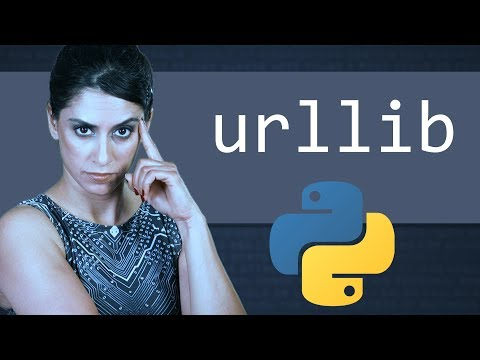

In [3]:
vid = YouTubeVideo('LosIGgon_KM', width = 600)
display(vid)

# Interacting with the Web

The Internet is a gigantic data dump. There is all the social networking data from Facebook, Twitter, and so on. There is the news from all the traditional media sources plus Quartz, Vox, and so on. Then there is the data from organizations such as the World Bank, the Bureau of Labor Statistics, the US Census, or Chicago's Data Portal.  Finally, you have all your scientific data sources: the National Cancer Institute, the ProteinBank, or the Kyoto Gene and Genomes Encyclopedia.

How can you use Python to access those sites and retrieve data for your research, your business, or your hobby?

There are two main approaches to retrieve data from websources. The preferred approach is using **Application Program Interfaces** or APIs.  If an organization has decided to share its data, and they have the forethought and resources to do it, they will develop an API that will let you interact with their data.

If the organization does not have the forethought or resources to create an API (or if they do not want to share their data), then you have to **crawl** their website and **scrape** their data.


# Application Program Interfaces

**We relied heavily for these materials on https://www.dataquest.io/blog/python-api-tutorial/**

APIs simplify the process of obtaining specific information from a data source.  You do not have to worry about figuring out the **format** in which the information is stored, or **where** the information is stored.  All of those matter are handled seamlessly by the API. 

But convenience is not the only advantage of an API. APIs are also particular useful when:

* You want a small piece of a much larger set of data. Reddit comments are one example. What if you want to just pull your own comments on Reddit? It doesn’t make much sense to download the entire Reddit database, then filter just your own comments.
    
* There is repeated computation involved. Spotify has an API that can tell you the genre of a piece of music. You could theoretically create your own classifier, and use it to categorize music, but you’ll never have as much data as Spotify does.
    
* The data is changing quickly. An example of this is stock price data. It doesn’t really make sense to regenerate a dataset and download it every minute – this will take a lot of bandwidth, and be pretty slow.
    
    
    
## Making a request

In order to learn how APIs work, we will first use the APIs developed to retrieve data on the **International Space Station (ISS)**.  The relevant APIs can be found at http://open-notify.org/.  We will first consider the API for retrieving the location (latitude and longitude) of the ISS (http://open-notify.org/Open-Notify-API/ISS-Location-Now/). The API is hosted at http://api.open-notify.org/iss-now.json. 

So, how do we make requests for information with this API?

Like standard webpages, APIs are also hosted on web servers. When you type http://www.google.com in your browser’s address bar, your computer is actually asking the http://www.google.com server for a webpage, which it then returns it to your browser for display. That action is called a `request`. APIs work much the same way, except instead of your web browser asking for a webpage, your program asks for **data**. This data is usually returned in JSON format.

There are many possible types of requests. The most common, and the one we will be using throughout this unit, is the `GET` request. A `GET` request simply accesses and downloads the webpage found at the URL you specified as an input. 

We will use the package [`requests`](http://docs.python-requests.org/en/latest/user/quickstart/) package to crawl (load) webpages and scrape (download) their contents.

In [ ]:
response = requests.get("http://api.open-notify.org/iss-now.json")

print( response )
print( response.status_code )


In [ ]:
print(dir(response))
print()

help(response)

Methods from the `requests` package return `Response` objects. One of the most important properties of the response is its `status code`, which is printed by default but which we can also get explicitly.

Here are some of the most common status codes you might encounter:
* 200, **OK**. Standard response for successful HTTP requests. The actual response will depend on the request method used.
* 301, **Moved Permanently**. The server is redirecting you to a different endpoint. This and all future requests should be directed to the given URL. This can happen when a company switches domain names, or an endpoint name is changed.
* 303, **See Other**. The response to the request can be found under another URI using a GET method. When received in response to a POST (or PUT/DELETE), the client should presume that the server has received the data and should issue a redirect with a separate GET message. Your web browser automatically fetches the new URL but web crawlers do not usually do this unless you specify it.
* 400, **Bad Request**. The server cannot or will not process the request due to an apparent client error (e.g., malformed request syntax, invalid request message framing, or deceptive request routing).
* 401, **Unauthorized**. Similar to `403 Forbidden`, but specifically for use when authentication is required and has failed or has not yet been provided. The response must include a WWW-Authenticate header field containing a challenge applicable to the requested resource.
* 403, **Forbidden**. The request was a valid request, but the server is refusing to respond to it. `403` error semantically means "unauthorized", i.e. the user does not have the necessary permissions for the resource.
* 404, **Not Found**. The requested resource could not be found but may be available in the future. Subsequent requests by the client are permissible.
* 500, **Internal Server Error**. A generic error message, given when an `unexpected` condition was encountered and no more specific message is suitable.
* 503, **Service Unavailable**. The server is currently unavailable (because it is overloaded or down for maintenance). Generally, this is a temporary state.
* 504, **Gateway Timeout**. The server was acting as a gateway or proxy and did not receive a timely response from the upstream server.[



More codes: http://en.wikipedia.org/wiki/List_of_HTTP_status_codes

The status code of our request was **200**. It means that all went well -- we successfully connected to the web address we wanted and downloaded its contents.

But `status codes` are not the only methods available:

In [ ]:
print( response.url )

In [ ]:
print( response.text )
print()

print(type(response.text))

This is the content format specified http://open-notify.org/Open-Notify-API/ISS-Location-Now/. It is in `json` format which means that we can easily parse it using the `json` module.

In [ ]:
data = json.loads(response.text)
print(type(data))
print()

print( data )


**YES**. 

The method `loads()` returns json formatted data as a dictionary. We can print whatever information we need from the dictionary using the appropriate `keys`.

In [ ]:
print(datetime.datetime(1970, 1, 1, 0, 0, 0) + datetime.timedelta(seconds = data['timestamp']))

In [ ]:
response = requests.get("http://api.open-notify.org/iss-now.json")
data = json.loads(response.text)

print( f"The ISS\'s current position is "
       f"{float(data['iss_position']['latitude']):.3f} degrees of latitude"
       f" and {float(data['iss_position']['longitude']):.3f} "
       f"degrees of longitude.")

<br> 

<br>

<br>


**Contrast the niceness above with what you get back when you do a request 
on a typical webpage...**

In [ ]:
my_url= 'http://www.google.com'
response = requests.get(my_url)
print(response.status_code)
print()

print(response.text)
print()

## Exercise: 

It is now time for you to try to use an API on your own. The last API available at [`Open Notify`](http://open-notify.org/) returns the number of astronauts in the ISS. Write the code to access that information.

<br>

<br>

# The Purple Air API

[PurpleAir](https://www2.purpleair.com/) provides an API interface for a worldwide (but US-centric) network of air quality monitoring stations. Real time data is accessible on the [Web](https://map.purpleair.com). 

If you visit that site, you will find something like the image below. It shows levels of particulates smaller than 2.5 microns. Green is good, red is bad, purple is terrible.

<center>
    <img src = '../Module_Interacting_w_Online_Data/Images/purple_air_map.png' width = '800'>
</center>

<br>

**In order to be able to interact with the air quality monitoring stations and retrieve data, you have to obtain API keys from PurpleAir.**

To do this, send an 
Send an email to `contact@purpleair.com`. I recommend that you use the subject line: *Requesting API key*. 

Read the [guidelines](https://community.purpleair.com/t/api-use-guidelines/1589). I want to emphasize in particular the sentence:

> For the historical API, we ask that you stay below or around 1000 requests per day.

**This means that:**

> **YOU SHOULD USE THE `API` AS FEW TIMES AS POSSIBLE TO REQUEST A PARTICULAR SET OF DATA AND THEN YOU SAVE THE DATA.**

**Do not keep making the same request every time you run the notebook!** 

Once you have your keys, place them in your authorization file so that they are not visible in the notebook.  

> { "PurpleAir": { "Read Key": "", "Write Key": "" } }


You can then read them with the code in the next cell.



In [10]:
with open(Path.cwd() / 'module_libraries' / 'amaral_auth.json', 'r') as f_in:
    auth = json.load( f_in )

print(auth['PurpleAir'].keys())
my_keys = auth['PurpleAir']

print()
print(my_keys['Read Key'][3:13])


dict_keys(['Read Key', 'Write Key'])

53E75-6F2A


<br>
<br>

## Finding stations

You can use provided functions to identify sensors around, for example, Chicago.

In [9]:
api_url = 'https://api.purpleair.com/v1/sensors/'
longitude, latitude, delta = -87., 41., 1.  # This around Chicago

station_names = get_stations(api_url, my_keys, longitude, latitude, delta)

station_names

Request was completed with code 200.



{'West Rigers Park': '4395',
 'West of St Ann School': '6546',
 'ODE': '36901',
 'Romney, IN': '37635',
 'Miller Beach': '37659',
 'Blueberry': '37667',
 'West Lawn': '39173',
 '6147 N Maplewood Living Room': '43955',
 'Beke-Sato Office': '45359',
 'Gladstone Park': '51933',
 'Chicago Ridge': '57645',
 'Loop': '65791',
 'Ishnala': '77067',
 'SPR5009': '85329',
 'Ukrainian Village Chicago': '87741',
 '37TH &amp; DAMEN': '95075',
 '36th and Paulina': '96035',
 '45th and Ashland': '96079',
 'wrightwood-drake': '96933',
 'NEIU-1.2': '101643',
 'Crown': '104712',
 'Peotone': '104738',
 'BurrRidge01': '107560',
 'La Grange Country Club Section': '120369',
 'RV': '122111',
 'Hinsdale, IL': '124183',
 'LUC_CARE 4': '124639',
 'LUC_CARE 2': '124649',
 'LUC_CARE8': '124677',
 'LUC_CARE 9': '124685',
 'NEIU-IN-1.1': '124715',
 'LUC_CARE6': '124737',
 'LUC_CARE5': '124743',
 'NEIU-IN-2.1': '124759',
 'Roscoe': '126519',
 'South Deering, Chicago 60617': '128349',
 'Prairieone': '133664',
 'CARE_SES

<br>
<br>

Now that we have the numerical codes of some stations, we can obtain information on them, including the most recent measurements.

In [12]:
my_station_id = '4395'
my_parameters = {'api_key': my_keys['Read Key']}

my_data = get_info_for_station( api_url, my_station_id, my_parameters ) 

if my_data is None:
    print('Station ID is not valid')
else:
    for key in my_data:
        print(f"{key:35}: {my_data[key]}")


Request was completed with code 200.

dict_keys(['api_version', 'time_stamp', 'data_time_stamp', 'sensor'])

api_version                        : V1.0.14-0.0.58
time_stamp                         : 1726782933
data_time_stamp                    : 1726782903
sensor                             : {'sensor_index': 4395, 'last_modified': 1706978831, 'date_created': 1510887416, 'last_seen': 1726782836, 'private': 0, 'is_owner': 0, 'name': 'West Rigers Park', 'icon': 0, 'location_type': 0, 'model': 'PA-II-SD', 'hardware': '2.0+OPENLOG+NO-DISK+DS3231+BME280+PMSX003-B+PMSX003-A', 'led_brightness': 35, 'firmware_version': '7.02', 'rssi': -62, 'uptime': 15180, 'pa_latency': 321, 'memory': 15904, 'position_rating': 5, 'latitude': 41.99566, 'longitude': -87.69185, 'altitude': 596, 'channel_state': 3, 'channel_flags': 0, 'channel_flags_manual': 0, 'channel_flags_auto': 0, 'confidence': 100, 'confidence_auto': 100, 'confidence_manual': 100, 'humidity': 26, 'humidity_a': 26, 'temperature': 95, 'tempera

<br>
<br>

You will notice that time_stamps are returned as seconds since January 1st, 1970 at midnight GMT time.

## Getting data

This makes it rather painful to ask for data for a given time period. but we can use `datetime` to make it easier.  For example, the cell below enable us to retrieve 3 days of data -- the maximum -- from Feb 1st, 2023 for Miller Beach.

In [18]:
dt_format = '%Y-%m-%d %H:%M:%S %Z%z'
start = datetime(2023, 2, 1, 0, 0, 0, tzinfo = timezone('America/Chicago'))
reference = datetime(1970, 1, 1, 0, 0, 0, tzinfo = timezone('Greenwich'))

print(start.astimezone(timezone('Greenwich')).strftime(dt_format))
print(reference.strftime(dt_format))

dt = start - reference
dt_start = int( dt.total_seconds() )


# If you want other variables, this is the place to add them 
# See the 'fields' key
#
my_station_id = '37659'
my_parameters = { 'api_key': my_keys['Read Key'], 
                  'fields': 'temperature,humidity,pm2.5_atm',
                  'start_timestamp': dt_start}


my_data = get_station_data( api_url, my_station_id, my_parameters, 
                            verbose = True ) 

my_data

2023-02-01 05:51:00 GMT+0000
1970-01-01 00:00:00 GMT+0000
Request was completed with code 200.



,time_stamp,sensor_index,humidity,temperature,pm2.5_atm
0,1676518200,37659,49.0,-230.0,11.546
1,1677869400,37659,51.0,-230.0,21.647
2,1677886200,37659,63.0,-230.0,29.946
3,1677831600,37659,49.2,-230.0,4.342
4,1678689000,37659,44.0,-230.0,8.113
...,...,...,...,...,...
8634,1679269800,37659,27.6,-230.0,5.777
8635,1676649000,37659,46.2,-230.0,0.693
8636,1676649600,37659,46.0,-230.0,0.796
8637,1676655000,37659,42.6,-230.0,1.822


<br>

We can transform time_stamp into a date and time so as to be readable by humans...

In [24]:
# Example use of this function
#
df = clean_station_data( my_data ) 
df

,time_stamp,sensor_index,humidity,temperature,pm2.5_atm,Date & Time
5509,1675230600,37659,34.0,-230.0,7.981,2023-02-01 05:50:00
3515,1675231200,37659,34.0,-230.0,9.254,2023-02-01 06:00:00
6455,1675231800,37659,34.6,-230.0,8.612,2023-02-01 06:10:00
5218,1675232400,37659,35.0,-230.0,9.554,2023-02-01 06:20:00
760,1675233000,37659,35.0,-230.0,9.409,2023-02-01 06:30:00
...,...,...,...,...,...,...
414,1680411600,37659,47.0,-230.0,1.925,2023-04-02 05:00:00
6964,1680412200,37659,47.0,-230.0,1.985,2023-04-02 05:10:00
5930,1680412800,37659,46.4,-230.0,2.001,2023-04-02 05:20:00
2277,1680413400,37659,46.0,-230.0,1.726,2023-04-02 05:30:00


## Plotting the data

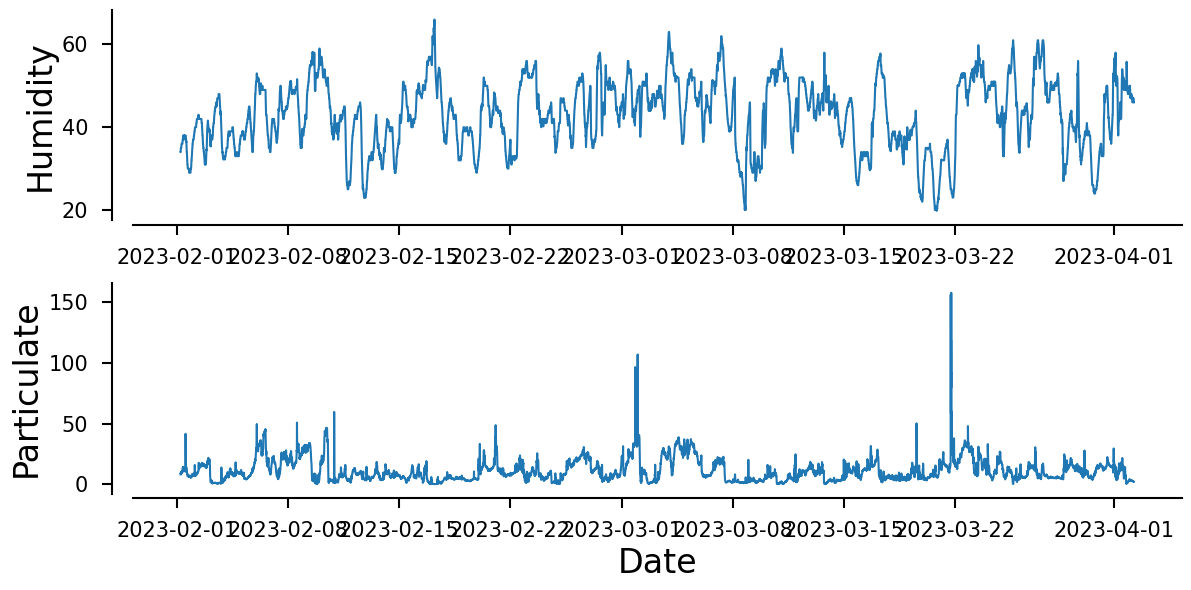

In [31]:
fig = plt.figure( figsize = (12, 6) )

ax0 = fig.add_subplot( 211 )
half_frame( ax0, '', 'Humidity', 15 )
ax0.plot(df['Date & Time'], df.humidity, )
# ax0.set_xticklabels(rotation = 45)


ax1 = fig.add_subplot( 212 )
half_frame( ax1, 'Date', 'Particulate', 15 )
ax1.plot(df['Date & Time'], df['pm2.5_atm'], )

plt.tight_layout()

<br>

<br>

<br>

# The US Census' APIs

The United States Census is a decennial census mandated by the United States Constitution. The United States Census Bureau (officially the Bureau of the Census) is responsible for the United States Census.

The first census after the American Revolution was taken in 1790, under Secretary of State Thomas Jefferson; there have been 22 federal censuses since that time. The current national census was held in 2010; the next census is scheduled for 2020 and will be largely conducted using the Internet. For years between the decennial censuses, the Census Bureau issues estimates made using surveys and statistical models.

The Census Bureau has begun rolling out their datasets via [APIs](http://www.census.gov/developers/). You can find a full list of APIs [here](http://www.census.gov/data/developers/data-sets.html).  In this unit, we will focus on the [decennial census](http://www.census.gov/data/developers/data-sets/decennial-census-data.html).



## Some useful dictionaries

Because we are dealing with US data, we will start by loading some helpful data: US city names, their states, and their geographic codes.  The relevant data is stored in `json` format `Data`.


In [ ]:
data_folder = Path.cwd() / 'Data' 

with open(data_folder / 'us_state_names.json') as file_in:
    state_codes = json.load( file_in )
    
with open(data_folder / 'us_places_by_state.json') as file_in:
    places_by_state = json.load( file_in )

print(state_codes.keys())

In [ ]:
print(state_codes['MA']['Name'])

**FIPS state codes** are numeric and two-letter alphabetic codes defined in U.S. Federal Information Processing Standard Publication ("FIPS PUB") 5-2 to identify U.S. states and certain other associated areas. The codes are used in Geographic Names Information System, overseen by the U.S. Board on Geographic Names. 

In [ ]:
print(places_by_state.keys())

In [ ]:
print(state_codes['MT'])
print()

for i in range(2):
    print(places_by_state['MT'][i])
    print()

Now that we have the basic information, we can start using the API to retrieve data. The Census Bureau has a number of helpful resources.  The [decennial census page](http://www.census.gov/data/developers/data-sets/decennial-census-data.html) constains basic instructions on how to contruct queries. There is a also a [page with examples](http://api.census.gov/data/2010/sf1/examples.html), and a page with a list of all (and I *really* mean **all**) [variable codes](http://api.census.gov/data/2010/sf1/variables.html).

**But, before we can do anything, you need to obtain a `key` that will identify you as the person doing the queries.**

In [32]:
with open(Path.cwd() / 'module_libraries' / 'amaral_auth.json', 'r') as file_in: 
    auth = json.load( file_in )
    
print(auth.keys())
print()

print(auth['census']['my_key'][3:13])
print()

my_key = auth['census']['my_key']

dict_keys(['census', 'fbi', 'PurpleAir'])

4e956ec8bd



## Getting a personal key

## Requesting some data



In [ ]:
census_url = 'http://api.census.gov/data/2010/dec/sf1?'

# P012 is the set of code for population by age and ethnicity
# P012A is white population
# P012A001 is total white population
# P012A002 is total white male population
# P012A003 is total white male population younger than 5 
# P012A026 is total white female population

response = requests.get( census_url, params = {'key': my_key, 
                                               'get': 'P012A001,NAME', 
                                               'for': 'state: *'} )

print(response.status_code)
HTML(response.text)

In [ ]:
ordered_codes = sorted( list(state_codes.keys()) )

for key in ordered_codes:
    print(key, state_codes[key]['fips_state'])

We can also write queries that obtain several data sets all at once. For example, we can obtain population by age and ethnicity using the codes:

* P012A018 -- Sex By Age (White Alone) MALE 15 yrs old
* P012A038 -- Sex By Age (White Alone) MALE 35 yrs old
* P012B018 -- Sex By Age (Black Or African American Alone) MALE 15 yrs old

And we can also restrict the query to a single state.

In [ ]:
data_codes = ''
for code in ['P012A018', 'P012A038', 'P012B018']:
    data_codes += code + ','
data_codes += 'NAME'
print(data_codes)
print()

state_fips = ( f"state:{state_codes['AK']['fips_state']},"
               f"{state_codes['IL']['fips_state']}" )

response = requests.get( census_url, params = {'key': my_key, 
                                               'get': data_codes, 
                                               'for': state_fips})

print(response.status_code)
data = json.loads(response.text)
df = pd.DataFrame(data[1:], columns = data[0])
df

We can also retrieve the population for specific cities.

In [ ]:
my_cities = []
for city in ['Chicago', 'Evanston', 'Wilmette', 'Aurora']:
    for i, data in enumerate(places_by_state['IL']):
        if city in data['Name']:
            print(i, data['Name'], data['GEOID'])
            my_cities.append(i)
            break

print(my_cities)
print()
     
state_fips = 'state:' + state_codes['IL']['fips_state']
location_codes = 'place:'
for i in my_cities:
    location_codes += places_by_state['IL'][i]['GEOID'][2:] + ','
location_codes = location_codes[:-1]

print(location_codes)
print()

response = requests.get( census_url, params = {'key': my_key, 
                                               'get': 'P012A001,NAME', 
                                               'for': location_codes, 
                                               'in': state_fips})



print(response.status_code)
print('---')
data = json.loads(response.text)
print(data)
print('---')

df = pd.DataFrame(data[1:], columns = data[0])
df

# Next lesson

[Click here](nb_02_HTML_scraping.ipynb)